# Learn Data Visualization: Replicating Cara Thompson's Work
This tutorial aims to reproduce Cara Thompson's work created with the ggplot2 package. My objective is to showcase how to produce a similar plot using plotnine, a Python version of ggplot2 developed by Posit. By following this tutorial, you will learn how to leverage plotnine to achieve the same high-quality visualizations in Python, bridging the gap between R and Python for data visualization.

## Loading the Required Libraries
In this section, I will load the `polars`, `plotnine`, and `mizani` libraries. These libraries are essential for the following tasks in this tutorial:

- `polars`: Efficient data manipulation and processing.
- `plotnine`: Creating high-quality plots and visualizations, similar to `ggplot2` in `R`.
- `mizani`: Providing additional scales and themes for `plotnine`.

While import * is generally discouraged in the Data Science community, I have chosen plotnine as an exception, especially when performing extensive customizations. This approach allows for more concise and readable code when working with numerous plotting functions. Although I could import only the specific functions I will use in this tutorial, I will stick to my approach for the sake of simplicity and flexibility.

In [1]:
# Loading Libraries
import polars as pl
import polars.selectors as cs
from plotnine import *
from mizani.labels import label_number

# Transforming the Data 
I copied the data below from Cara's website. In the code snippet below, I will use the pl.concat_str method from the polars library to create the labels. This method allows us to horizontally concatenate multiple columns into a single string column, which is useful for creating descriptive labels for our visualizations.

In [6]:
# Format the dataset
colors = ['orange', 'darkgreen', 'pink', '#2c3d4f']
raw = {'label': ['Group A', 'Group B', 'Group C', 'Group D'],
      'colors': ['orange', 'darkgreen', 'pink', '#2c3d4f'],
      'numbers': [39, 33, 17, 8],
      'units': '%'
      }

# Transform dataset into a polars DataFrame
df =  (
    pl.DataFrame(raw)
    .with_columns(pct=pl.concat_str([pl.col('numbers'), pl.col('units')], separator=''))
    .with_columns(text_labels=pl.concat_str([pl.col('label'), pl.col('pct')], separator='\n'))
)

# Inspect output
print(df)

shape: (4, 6)
┌─────────┬───────────┬─────────┬───────┬─────┬─────────────┐
│ label   ┆ colors    ┆ numbers ┆ units ┆ pct ┆ text_labels │
│ ---     ┆ ---       ┆ ---     ┆ ---   ┆ --- ┆ ---         │
│ str     ┆ str       ┆ i64     ┆ str   ┆ str ┆ str         │
╞═════════╪═══════════╪═════════╪═══════╪═════╪═════════════╡
│ Group A ┆ orange    ┆ 39      ┆ %     ┆ 39% ┆ Group A     │
│         ┆           ┆         ┆       ┆     ┆ 39%         │
│ Group B ┆ darkgreen ┆ 33      ┆ %     ┆ 33% ┆ Group B     │
│         ┆           ┆         ┆       ┆     ┆ 33%         │
│ Group C ┆ pink      ┆ 17      ┆ %     ┆ 17% ┆ Group C     │
│         ┆           ┆         ┆       ┆     ┆ 17%         │
│ Group D ┆ #2c3d4f   ┆ 8       ┆ %     ┆ 8%  ┆ Group D     │
│         ┆           ┆         ┆       ┆     ┆ 8%          │
└─────────┴───────────┴─────────┴───────┴─────┴─────────────┘


Unlike the `ggplot2` library, right-aligning the caption in `plotnine` can be challenging. To achieve this, I will break the caption into two parts: __caption_1__ ("#BarBeRight", which will be right-aligned using the .format string method to push the text to the right) and __caption_2__ (the link to the original article). This approach ensures the hashtag is neatly aligned on the right, while the article link remains accessible and prominently displayed.

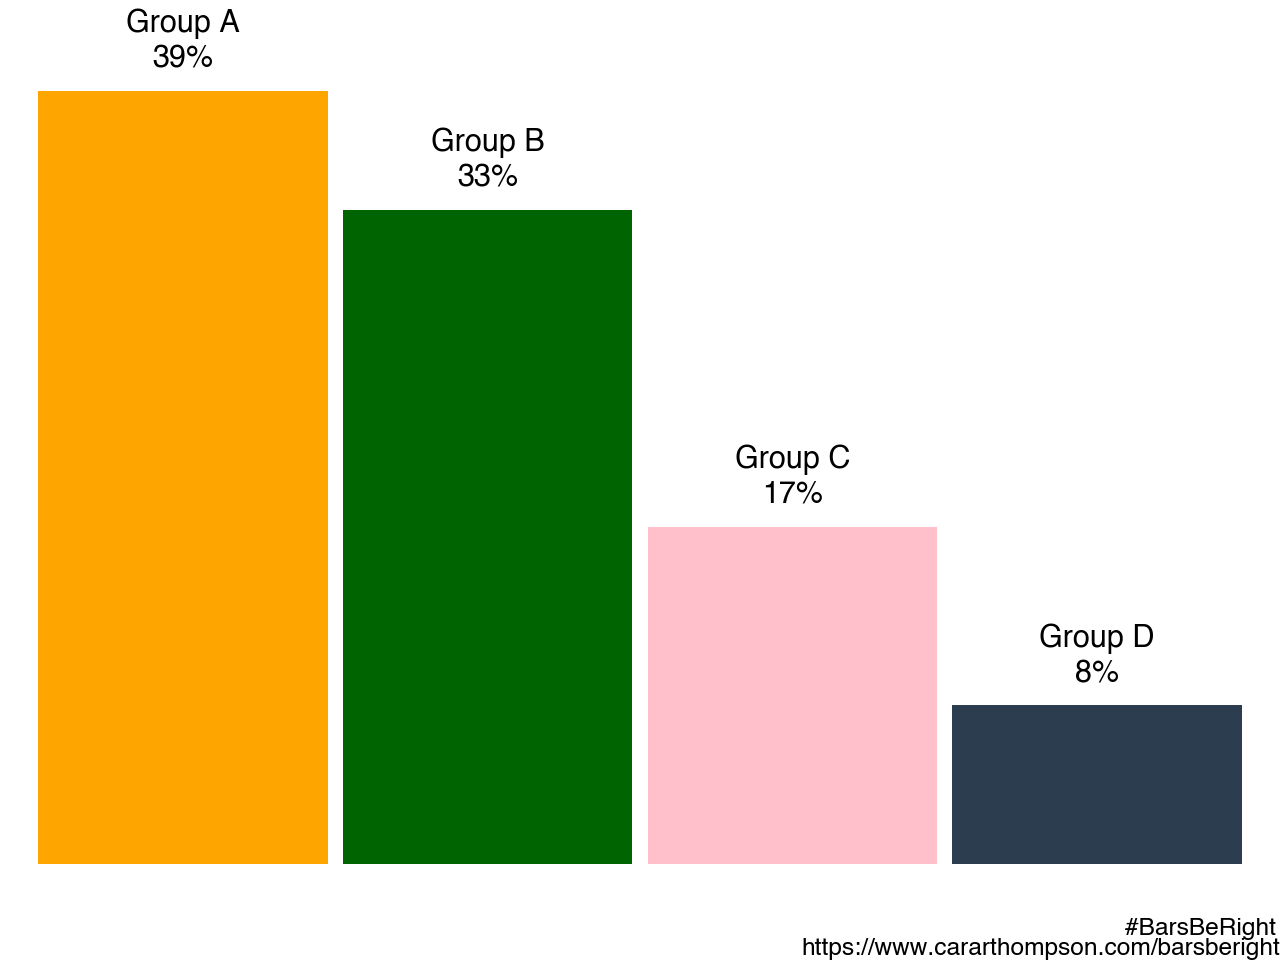

In [3]:
# Replicating Cara Thompson's bar plot for learning purposes
caption_1 = '{:>60}'.format('#BarsBeRight')
caption_2 = 'https://www.cararthompson.com/barsberight'

# Plot a bargraph
(   # Instantiate the canvas
    ggplot(df, aes('label', 'numbers'))
    # Add the bars, set the fill to our specified colors, and adjust the column widths
    + geom_col(fill=colors, width = 0.95)
    # Add the labels and push the up by 2.5 units
    + geom_text(aes(label='text_labels'), nudge_y=2.5)
    # Format the plot with theme_void
    + theme_void()
    # Add caption and format it with the f-strings methog
    + labs(caption=f'{caption_1}\n{caption_2}')
    # Adjust the caption
    + theme(
        plot_caption=element_text(ha='right'),
    )
)

In the next section, I will modify the colors to make our visual more appealing and professional. Effective use of color can enhance readability and ensure that the visual communicates information clearly and effectively.

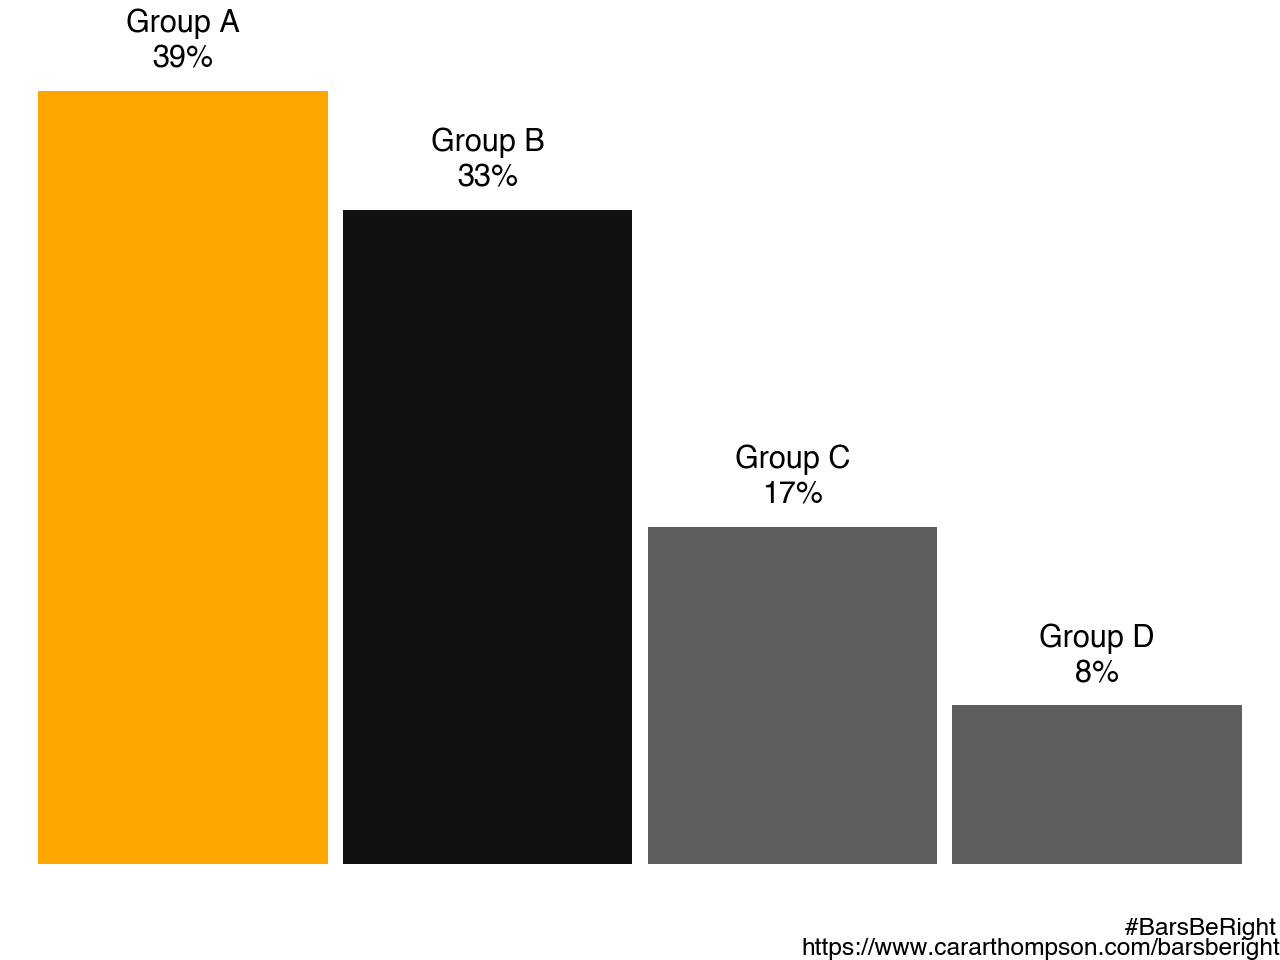

In [7]:
# Modify colors
new_colors = ['orange', '#111111', '#5E5E5E', '#5E5E5E']
(
    ggplot(df, aes('label', 'numbers'))
    + geom_col(fill=new_colors, width = 0.95)
    + geom_text(aes(label='text_labels'), nudge_y=2.5)
    + theme_void()
    + labs(caption=f'{caption_1}\n{caption_2}')
    + theme(
        plot_caption=element_text(ha='right'),
    )
)

# Closing Remarks
This tutorial, a reproduction of __Cara Thompson's work__, demonstrated how to plot and customize bar plots using the `plotnine` library. My goal is to learn `plotnine` and to assist fellow data scientists and analysts in mastering it as well. Having used the `ggplot2` package since May 2018, I am now transitioning to `Python` and intend to leverage the capabilities of both `plotnine` and `great_tables`.

# Acknowledgements

I extend my gratitude to [__Cara Thompson__](https://www.cararthompson.com/barsberight) for her guidance in enhancing my data visualization skills. I highly recommend exploring her work and following her for valuable insights on DataViz best practices."

__Happy Learning!__